In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [14]:
df = pd.read_csv(r"C:\Users\Pratinav jinwal\OneDrive\Desktop\4th Sem\Capstone Project\code for compairing the models\Suicide rate vs. death rate from violence, 2019 (2) 2.csv")
df.head()

,Entity,Code,Year,Deaths - Self-harm - Sex: Both - Age: Age-standardized (Rate),Deaths - All forms of violence - OWID - Sex: Both - Age: Age-standardized (Rate),Population (historical estimates),Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,1990,8.28,29.79,10694804.0,NaN
2,Afghanistan,AFG,1991,8.17,46.43,10745168.0,NaN
3,Afghanistan,AFG,1992,8.14,48.07,12057436.0,NaN
4,Afghanistan,AFG,1993,8.23,43.19,14003764.0,NaN


In [15]:
# Yearly Grouping 

yearly_averages = df.groupby('Year').agg({
    'Deaths - Self-harm - Sex: Both - Age: Age-standardized (Rate)': 'mean',
    'Deaths - All forms of violence - OWID - Sex: Both - Age: Age-standardized (Rate)': 'mean'
}).reset_index()

yearly_averages.head()

,Year,Deaths - Self-harm - Sex: Both - Age: Age-standardized (Rate),Deaths - All forms of violence - OWID - Sex: Both - Age: Age-standardized (Rate)
0,-10000,NaN,NaN
1,-9000,NaN,NaN
2,-8000,NaN,NaN
3,-7000,NaN,NaN
4,-6000,NaN,NaN


In [16]:
# Considering years from 1990-2019

yearly_averages_recent = yearly_averages[yearly_averages['Year'] >= 1990]

yearly_averages_recent.head()

,Year,Deaths - Self-harm - Sex: Both - Age: Age-standardized (Rate),Deaths - All forms of violence - OWID - Sex: Both - Age: Age-standardized (Rate)
231,1990,12.978026,13.451447
232,1991,13.021009,15.239868
233,1992,13.117193,12.198070
234,1993,13.313509,13.081009
235,1994,13.453860,59.370088


# Death Rate over Time

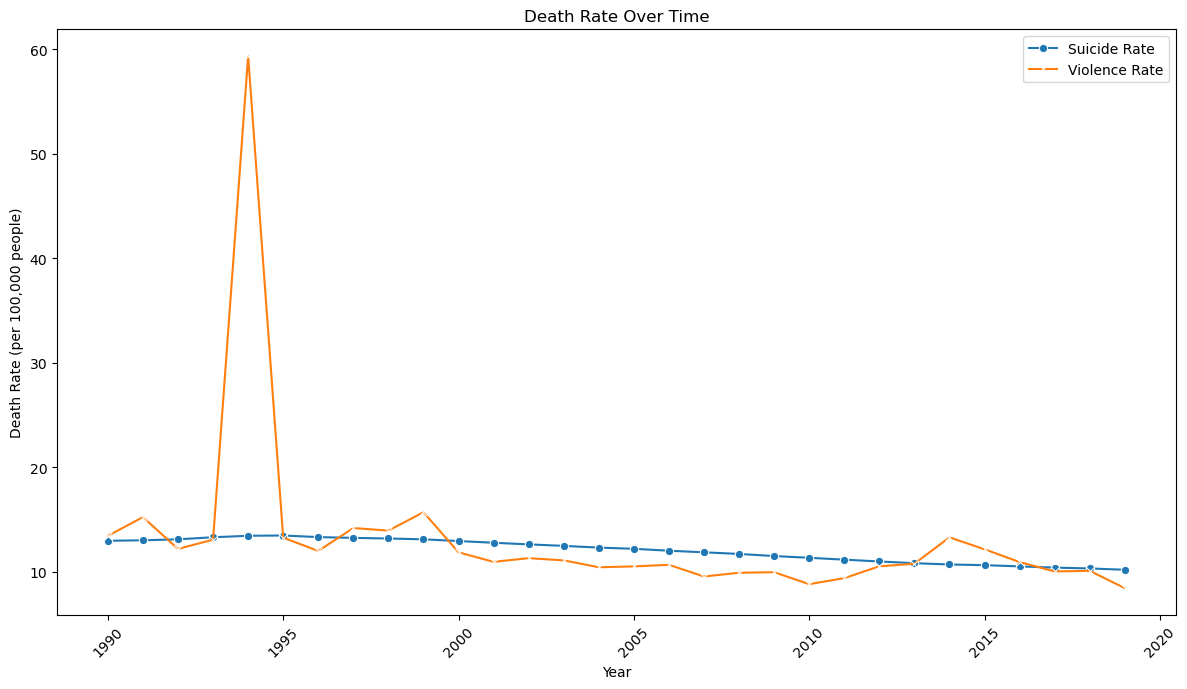

In [17]:
plt.figure(figsize=(12, 7))

# Suicide rate
sns.lineplot(x='Year', y='Deaths - Self-harm - Sex: Both - Age: Age-standardized (Rate)', data=yearly_averages_recent, label='Suicide Rate', marker='o')

# All forms of violence rate
sns.lineplot(x='Year', y='Deaths - All forms of violence - OWID - Sex: Both - Age: Age-standardized (Rate)', data=yearly_averages_recent, label='Violence Rate', marker='x')

plt.title('Death Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Death Rate (per 100,000 people)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [18]:
yearly_averages_recent.describe()

,Year,Deaths - Self-harm - Sex: Both - Age: Age-standardized (Rate),Deaths - All forms of violence - OWID - Sex: Both - Age: Age-standardized (Rate)
count,32.000000,30.000000,30.000000
mean,2005.500000,12.064289,13.110730
std,9.380832,1.106931,8.927471
min,1990.000000,10.201579,8.446623
25%,1997.750000,11.039737,10.185033
50%,2005.500000,12.265154,11.030241
75%,2013.250000,13.091798,13.222851
max,2021.000000,13.480526,59.370088


In [19]:
mean_value = yearly_averages_recent['Deaths - All forms of violence - OWID - Sex: Both - Age: Age-standardized (Rate)'].mean()
std = yearly_averages_recent['Deaths - All forms of violence - OWID - Sex: Both - Age: Age-standardized (Rate)'].std()

# Defining the range within 3 standard deviations from the mean
lower_bound = mean_value - (3 * std)
upper_bound = mean_value + (3 * std)

yearly_averages_recent = yearly_averages_recent[
    (yearly_averages_recent['Deaths - All forms of violence - OWID - Sex: Both - Age: Age-standardized (Rate)']>= lower_bound) &
    (yearly_averages_recent['Deaths - All forms of violence - OWID - Sex: Both - Age: Age-standardized (Rate)']<= upper_bound)
    ]


yearly_averages_recent.describe()

,Year,Deaths - Self-harm - Sex: Both - Age: Age-standardized (Rate),Deaths - All forms of violence - OWID - Sex: Both - Age: Age-standardized (Rate)
count,29.000000,29.000000,29.000000
mean,2004.862069,12.016373,11.515579
std,8.728951,1.094403,1.866753
min,1990.000000,10.201579,8.446623
25%,1998.000000,10.996623,10.099254
50%,2005.000000,12.208070,10.960000
75%,2012.000000,13.021009,13.081009
max,2019.000000,13.480526,15.707368


In [20]:
yearly_averages_recent.to_csv("yearly_averages_recent_withoutOutlier")

# Violence Rate

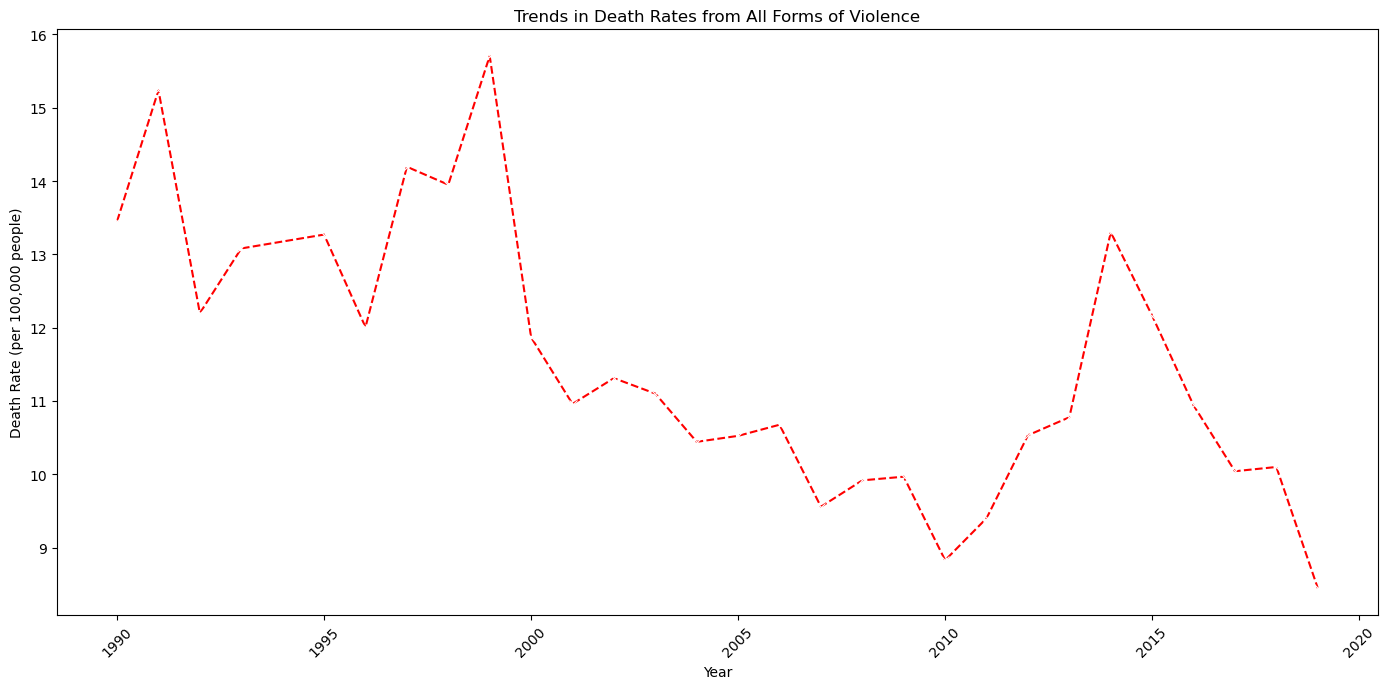

In [21]:
plt.figure(figsize=(14, 7))

# All forms of violence rate
sns.lineplot(x='Year', y='Deaths - All forms of violence - OWID - Sex: Both - Age: Age-standardized (Rate)', data=yearly_averages_recent, color='red', marker='x', linestyle='--')

plt.title('Trends in Death Rates from All Forms of Violence')
plt.xlabel('Year')
plt.ylabel('Death Rate (per 100,000 people)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# stationarity check

In [22]:
from statsmodels.tsa.stattools import adfuller

# Using Dickey-Fuller test for stationarity on the violence rate
adf_test = adfuller(yearly_averages_recent['Deaths - All forms of violence - OWID - Sex: Both - Age: Age-standardized (Rate)'].dropna())

adf_statistic, p_value = adf_test[0], adf_test[1]

adf_statistic, p_value

(-1.9306145060803688, 0.3177989311971388)

Interpretation:
- ADF Statistic: The more negative the statistic, the stronger the rejection.
- P-value: A p-value below a threshold suggests rejecting the null hypothesis of non-stationarity.


# Linear Regression

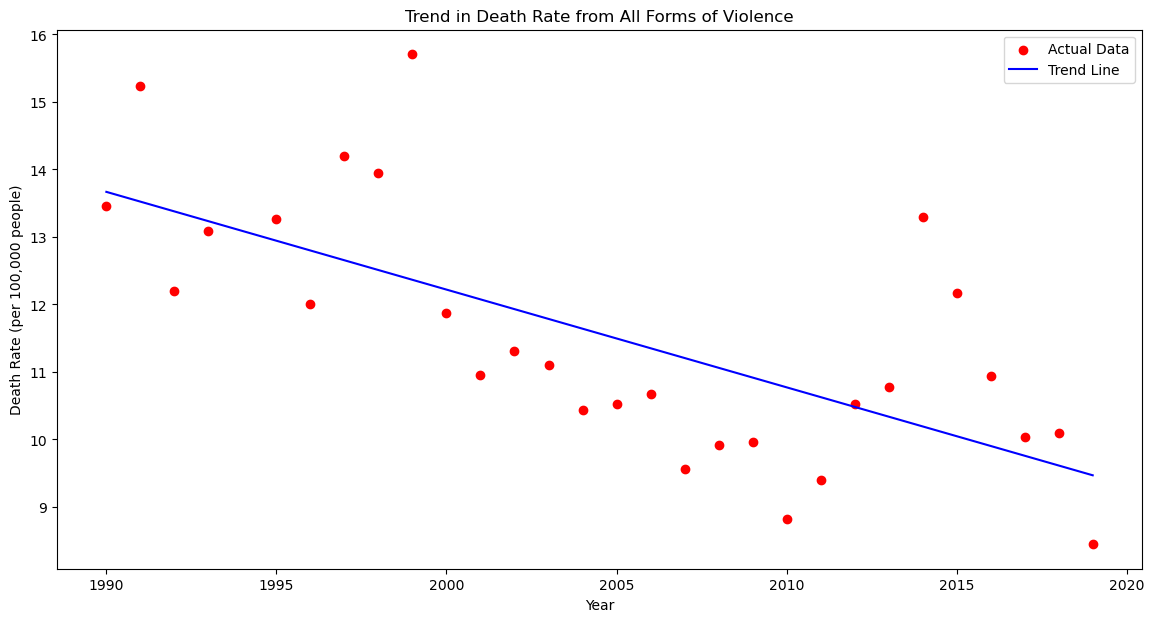

Slope: -0.14482409
P-value: 0.00005468


In [29]:
from scipy.stats import linregress

violence_rate_clean = yearly_averages_recent[['Year', 'Deaths - All forms of violence - OWID - Sex: Both - Age: Age-standardized (Rate)']].dropna()

slope_clean, intercept_clean, r_value_clean, p_value_clean, std_err_clean = linregress(violence_rate_clean['Year'], violence_rate_clean['Deaths - All forms of violence - OWID - Sex: Both - Age: Age-standardized (Rate)'])

# Plotting the regression line
plt.figure(figsize=(14, 7))
plt.scatter(violence_rate_clean['Year'], violence_rate_clean['Deaths - All forms of violence - OWID - Sex: Both - Age: Age-standardized (Rate)'], label='Actual Data', color='red')
plt.plot(violence_rate_clean['Year'], intercept_clean + slope_clean * violence_rate_clean['Year'], 'b', label='Trend Line')

plt.title('Trend in Death Rate from All Forms of Violence')
plt.xlabel('Year')
plt.ylabel('Death Rate (per 100,000 people)')
plt.legend()
plt.show()

# Displaying slope and p-value
slope_clean_formatted = format(slope_clean, '.8f')
p_value_clean_formatted = format(p_value_clean, '.8f')

print("Slope:", slope_clean_formatted)
print("P-value:", p_value_clean_formatted)


Interpretation:
- Slope: The negative slope suggests a decreasing trend in the violence rate over time. Specifically, the violence rate has been decreasing on average by 0.36 units per year.
- P-value: As we got our p-value in significant range then we can consider this value.

# **Exponential Smoothing**

# Checking errors

In [32]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Excluding the last 5 years of data 
data_for_fitting = violence_rate_clean[violence_rate_clean['Year'] < violence_rate_clean['Year'].max() - 4]


model_excl_last5 = ExponentialSmoothing(
    data_for_fitting['Deaths - All forms of violence - OWID - Sex: Both - Age: Age-standardized (Rate)'],
    trend='add', 
    seasonal=None, 
    initialization_method="estimated"
)

# Fitting the model
model_fit_excl_last5 = model_excl_last5.fit()

# Forecasting the next 5 years 
forecast_last5 = model_fit_excl_last5.forecast(5)

# Actual values 
actual_last5 = violence_rate_clean['Deaths - All forms of violence - OWID - Sex: Both - Age: Age-standardized (Rate)'].tail(5)

# Calculating the Mean Absolute Error 
errors_last5_des = np.abs(forecast_last5.values - actual_last5.values)
mae_last5_des = np.mean(errors_last5_des)
rmse_last5_des = np.sqrt(np.mean(errors_last5_des**2))

# Displaying the forecasted values, actual values, and the MAE
forecast_comparison_last5_des_corrected = pd.DataFrame({
    'Year': violence_rate_clean['Year'].tail(5).values,  
    'Forecast': forecast_last5.values,
    'Actual': actual_last5.values,
    'Absolute Error': errors_last5_des
})


mae_last5_des_corrected = np.mean(errors_last5_des)

forecast_comparison_last5_des_corrected, mae_last5_des_corrected,rmse_last5_des


C:\Users\Pratinav jinwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Pratinav jinwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


(   Year   Forecast     Actual  Absolute Error
 0  2015  12.034840  12.163158        0.128318
 1  2016  11.961911  10.940439        1.021472
 2  2017  11.888982  10.041360        1.847622
 3  2018  11.816053  10.099254        1.716798
 4  2019  11.743124   8.446623        3.296501,
 1.6021422099471483,
 1.9124795530282575)

# Forecast from Exponential smoothing

In [35]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import numpy as np
import pandas as pd

model_full = ExponentialSmoothing(
    violence_rate_clean['Deaths - All forms of violence - OWID - Sex: Both - Age: Age-standardized (Rate)'],
    trend='add', 
    seasonal=None,
    initialization_method="estimated"
)

# Fitting the model
model_fit_full = model_full.fit()

# Forecasting
last_year = violence_rate_clean['Year'].max()
forecast_years = np.arange(last_year + 1, last_year + 6) 
forecast_next5 = model_fit_full.forecast(len(forecast_years))

# Creating a DataFrame for the forecasted values
forecast_df_next5 = pd.DataFrame({
    'Year': forecast_years,
    'Forecast': forecast_next5
})

forecast_df_next5


C:\Users\Pratinav jinwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Pratinav jinwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


,Year,Forecast
29,2020,8.864455
30,2021,8.692677
31,2022,8.520898
32,2023,8.349120
33,2024,8.177342


# Visualisation from Forecased result 

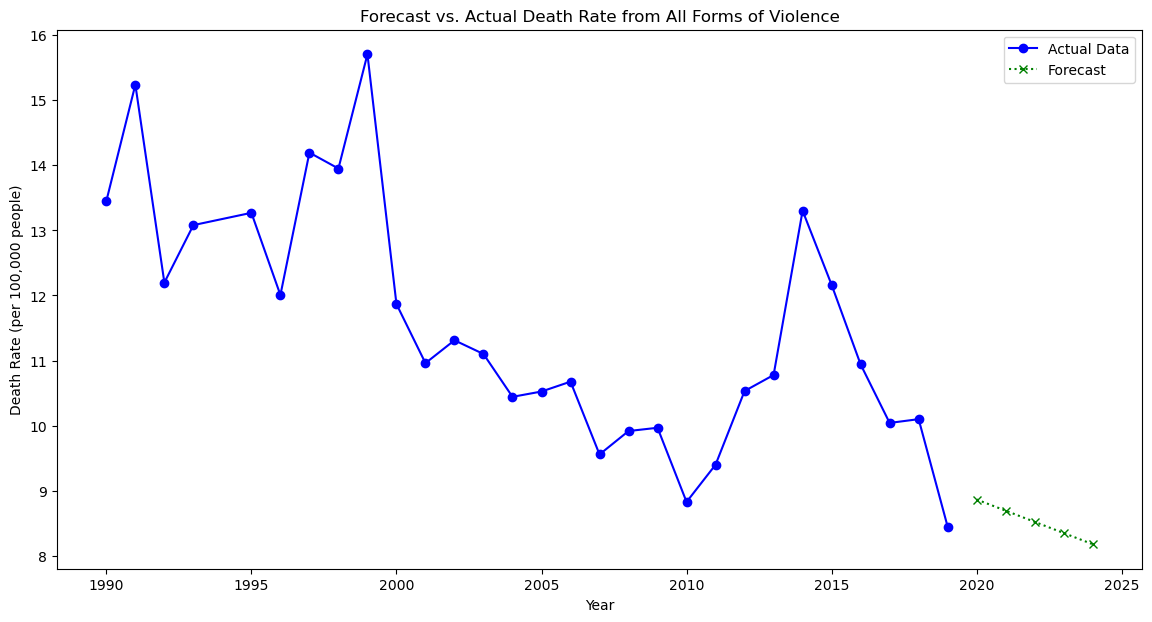

In [43]:
import matplotlib.pyplot as plt

last_year_in_data = violence_rate_clean['Year'].max()
forecast_years_again = violence_rate_clean.iloc[-5:,0]
forecast_years_extended = np.arange(last_year_in_data + 1, last_year_in_data + 6)

plt.figure(figsize=(14, 7))

# Plotting the actual data
plt.plot(violence_rate_clean['Year'], violence_rate_clean['Deaths - All forms of violence - OWID - Sex: Both - Age: Age-standardized (Rate)'], label='Actual Data', color='blue', marker='o', linestyle='-')

# Plotting the forecast for the next 5 years
plt.plot(forecast_years_extended, forecast_df_next5['Forecast'], label='Forecast', color='green', marker='x', linestyle=':')

plt.title('Forecast vs. Actual Death Rate from All Forms of Violence')
plt.xlabel('Year')
plt.ylabel('Death Rate (per 100,000 people)')
plt.legend()
plt.show()
